In [1]:
import pandas as pd

books = pd.read_csv("bestsellers with categories.csv")
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


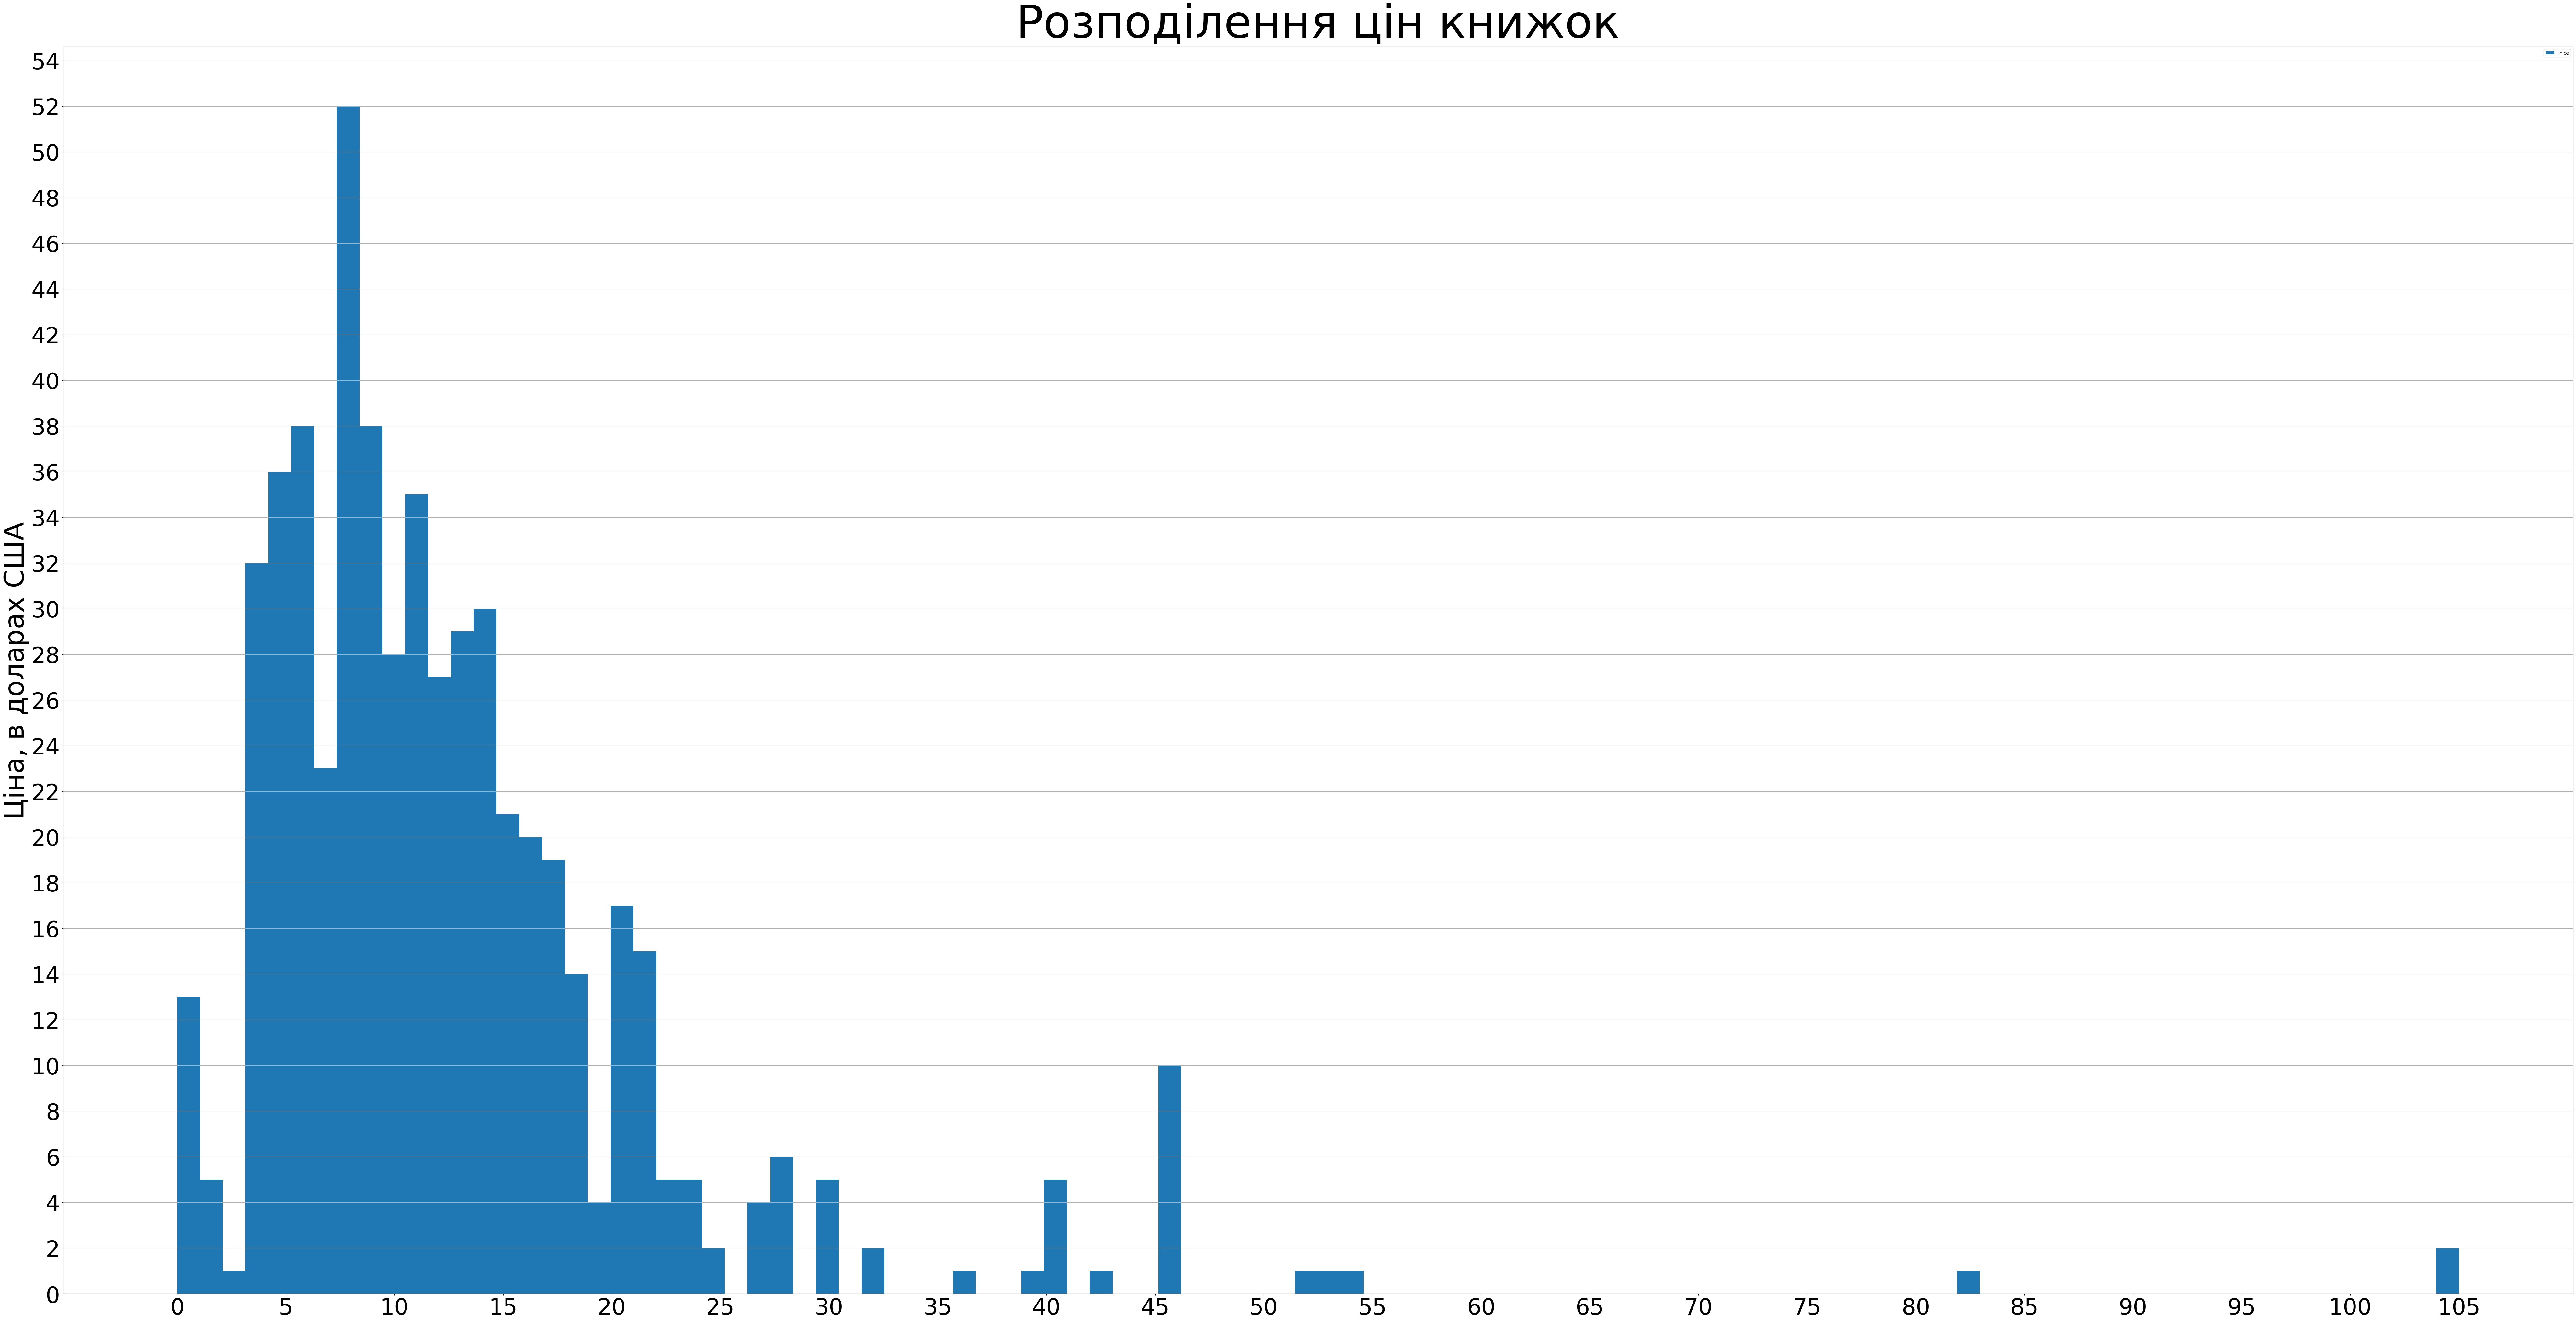

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

books[['Price']].plot(kind='hist', bins=100, fontsize=50)
plt.rcParams["figure.figsize"] = (100,50)
plt.xticks(range(0, 110, 5))
plt.yticks(range(0, 55, 2))
plt.ylabel('Ціна, в доларах США', fontsize=60)
plt.grid(axis='y')
plt.title('Розподілення цін книжок', fontsize=100)
plt.show()

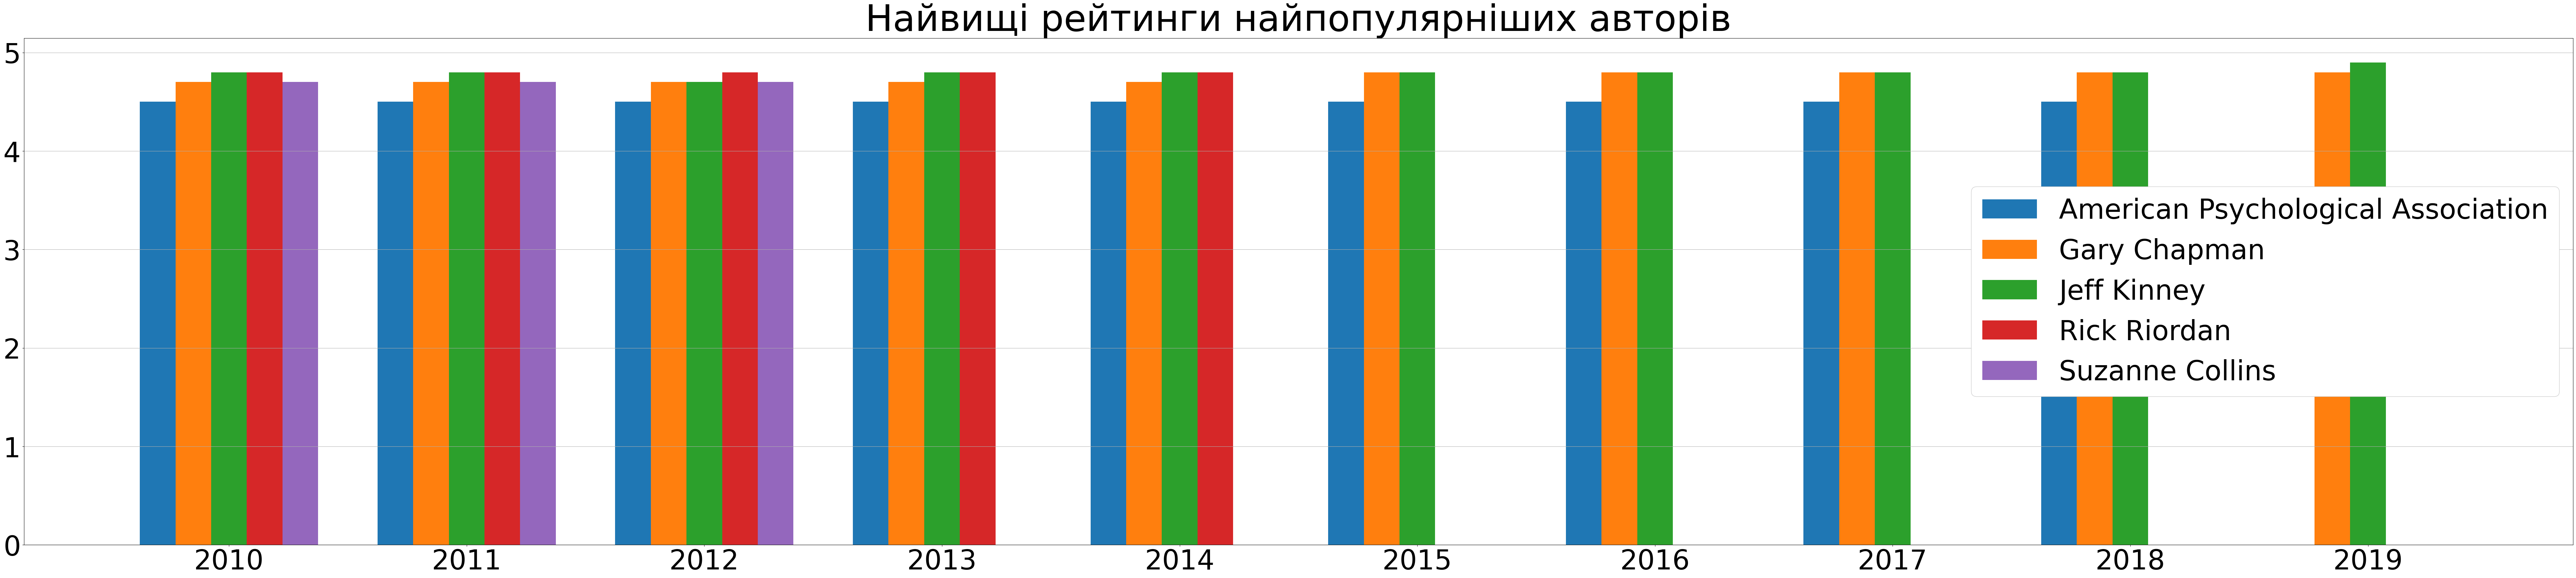

In [8]:
from numpy import arange

count_by_authors = books.groupby('Author')['Author'].count().to_frame().rename(columns={'Author': 'count'}).sort_values('count', ascending=False)
top_5_authors = sorted(count_by_authors[:5:].index.tolist())
years = range(2010, 2020)
x_axis = arange(10)
shifts = [-0.3, -0.15, 0, 0.15, 0.3]
fig, axs = plt.subplots()
for i in range(5):
    ratings = []
    for y in years:
        df = books[(books['Author'] == top_5_authors[i]) & (books['Year'] == y)][['User Rating']]
        if df.empty:
            ratings.append(0)
        else:
            ratings.append(df.values[0][0])
    axs.bar(x_axis+shifts[i], ratings, label=top_5_authors[i], width=0.15)
plt.legend(loc='right', fontsize=60, framealpha=1)
plt.xticks(x_axis, years, fontsize=60)
plt.yticks(fontsize=60)
plt.grid(axis='y')
plt.rcParams["figure.figsize"] = (100,20)
plt.title("Найвищі рейтинги найпопулярніших авторів", fontsize=80)
plt.show()

[240, 310]


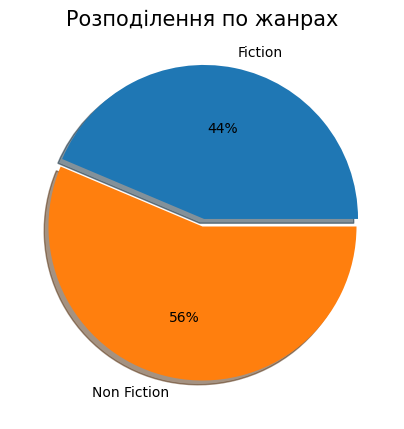

In [38]:
count_by_genre = books.groupby('Genre')['Genre'].count().to_frame().rename(columns={'Genre': 'count'})
labels = count_by_genre.index.tolist()
data = count_by_genre.values.flatten().tolist()
print(data)
plt.pie(data, labels=labels, explode=[0.05, 0], shadow=True, autopct="%1.0f%%")
plt.rcParams["figure.figsize"] = (5,5)
plt.title("Розподілення по жанрах", fontsize=15)
plt.show()